# Drug Abuse In Singapore - By Kavya

In [1]:
import pandas as pd

# Judicial Executions
# https://data.gov.sg/dataset/judicial-executions
data1 = pd.read_csv('Data/judicial-executions.csv', sep=",")

# Population of inmates in drug rehabilation Centre
# https://data.gov.sg/dataset/population-of-inmates-in-drc
data2 = pd.read_csv('Data/population-of-inmates-in-drug-rehabilitation-centre-drc-by-age-group.csv', sep=",")

# Demographic Profile of Drug Abusers
# https://data.gov.sg/dataset/demographic-profile-of-drug-abusers
data3 = pd.read_csv('Data/drug-abusers-by-age-group.csv', sep=",") 
data4 = pd.read_csv('Data/drug-abusers-by-status.csv', sep=",")

# Prevalance of substance use disorders
# https://ourworldindata.org/drug-use
data5 = pd.read_csv('Data/share-with-alcohol-or-drug-use-disorders.csv')

In [2]:
dataArray = [data1, data2, data3, data4, data5]
for i in range(len(dataArray)):
    print("*" * 6)
    print("Data" + str(i + 1))
    print("*" * 6)
    
    print("\nShape of Data" + str(i + 1) +":")
    print(str(dataArray[i].shape) + "\n")
    
    print("Index of Data" + str(i + 1) +":")
    print(str(dataArray[i].index) + "\n")
    
    print("Columns in Data" + str(i + 1) +":")
    print(str(dataArray[i].columns) + "\n")
    
    print("Total number of non-NA values in Data" + str(i + 1) +":")
    print(str(dataArray[i].count()) + "\n")
    
    print("Summary of Data" + str(i + 1) +":")
    print(str(dataArray[i].info()) + "\n")
    
    print("Statistical summary of Data" + str(i + 1) +":")
    print(str(dataArray[i].describe()) + "\n")
    print("*" * 120)

******
Data1
******

Shape of Data1:
(45, 3)

Index of Data1:
RangeIndex(start=0, stop=45, step=1)

Columns in Data1:
Index(['year', 'types_of_judical_executions', 'number_of_judical_executions'], dtype='object')

Total number of non-NA values in Data1:
year                            45
types_of_judical_executions     45
number_of_judical_executions    45
dtype: int64

Summary of Data1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   year                          45 non-null     int64 
 1   types_of_judical_executions   45 non-null     object
 2   number_of_judical_executions  45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None

Statistical summary of Data1:
              year  number_of_judical_executions
count    45.000000                     45.000000
mean   2014.000000               

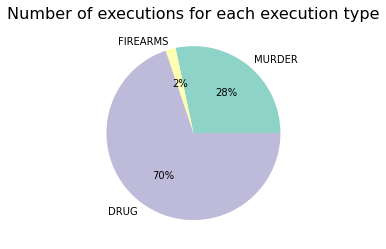

In [3]:
# Find the capital punishment that has the most number of executions

import matplotlib.pyplot as plt
import seaborn as sns

# get the different execution types and store it in executionTypes as array
executionTypes = data1['types_of_judical_executions'].unique()

# empty list to store the total executions for each type of punishment
totalPerType = []
# loop through executionTypes array
for i in executionTypes:
    # get the data for the capital punishment currently being looped
    allPerType = data1[data1['types_of_judical_executions'] == i]
    # get the sum of all the executions over the years for the current punishment being looped
    totalExecutions = allPerType['number_of_judical_executions'].sum()
    # add the sum into the totalPerType list
    totalPerType.append(totalExecutions)
    
#define Seaborn color palette to use
colors = sns.color_palette("Set3")

#add overall title
plt.title('Number of executions for each execution type', fontsize=16)

#create pie chart
plt.pie(totalPerType, labels = executionTypes, colors = colors, autopct='%.0f%%')
plt.show()

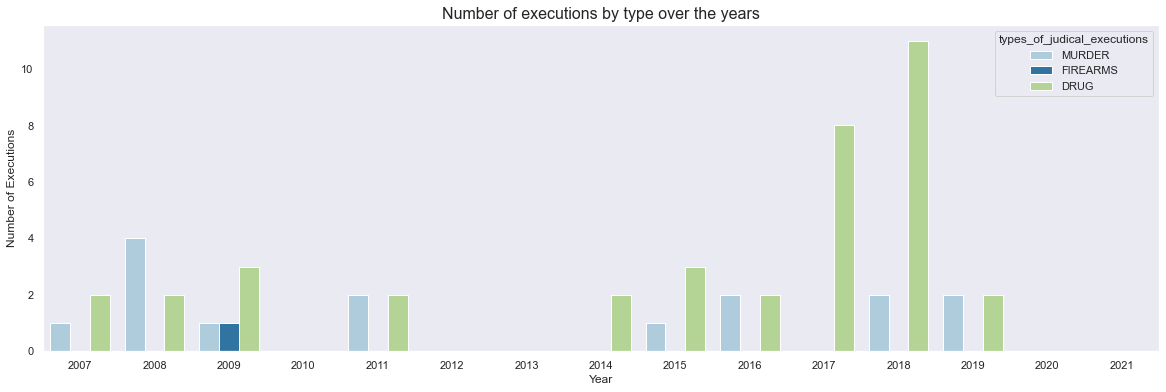

In [4]:
# compare the growth of each of the execution type over the years

import matplotlib.pyplot as plt
import seaborn as sns

# set size for plotting
plt.figure(figsize=(20, 6))

#set seaborn plotting aesthetics
sns.set(style='dark')

#create grouped bar chart
sns.barplot(x='year', y='number_of_judical_executions', hue='types_of_judical_executions', data=data1, 
            palette=sns.color_palette("Paired"))

#add overall title
plt.title('Number of executions by type over the years', fontsize=16)

#add axis titles
plt.xlabel('Year')
plt.ylabel('Number of Executions')

plt.show()

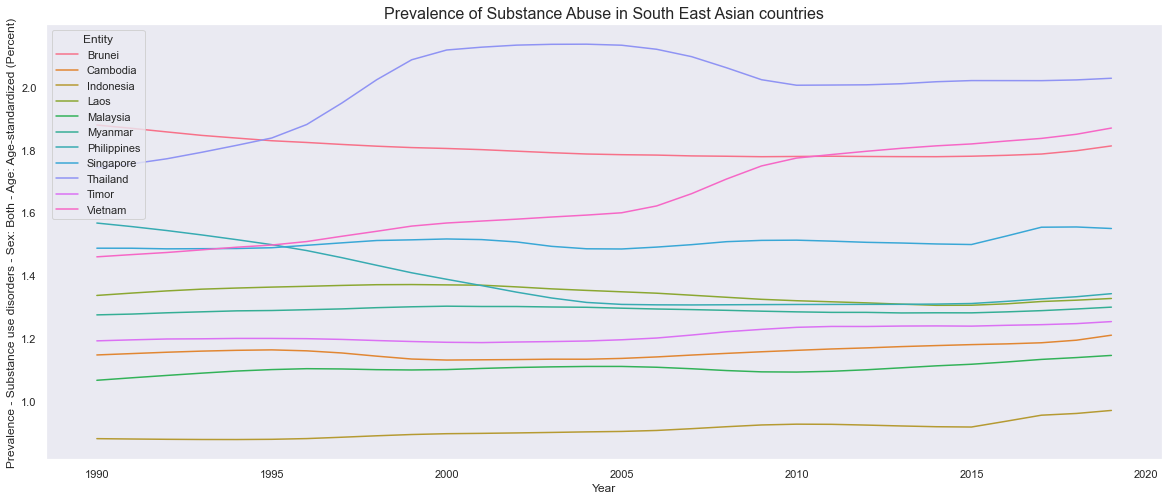

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of all SEA Countries
SEA = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor', 'Vietnam']
df = data5.loc[data5['Entity'].isin(SEA)]

# set size for plotting
plt.figure(figsize=(20, 8))

#Plot line chart
sns.lineplot(x="Year", y="Prevalence - Substance use disorders - Sex: Both - Age: Age-standardized (Percent)", hue="Entity", data=df)

plt.title("Prevalence of Substance Abuse in South East Asian countries", fontsize=16)
plt.show()

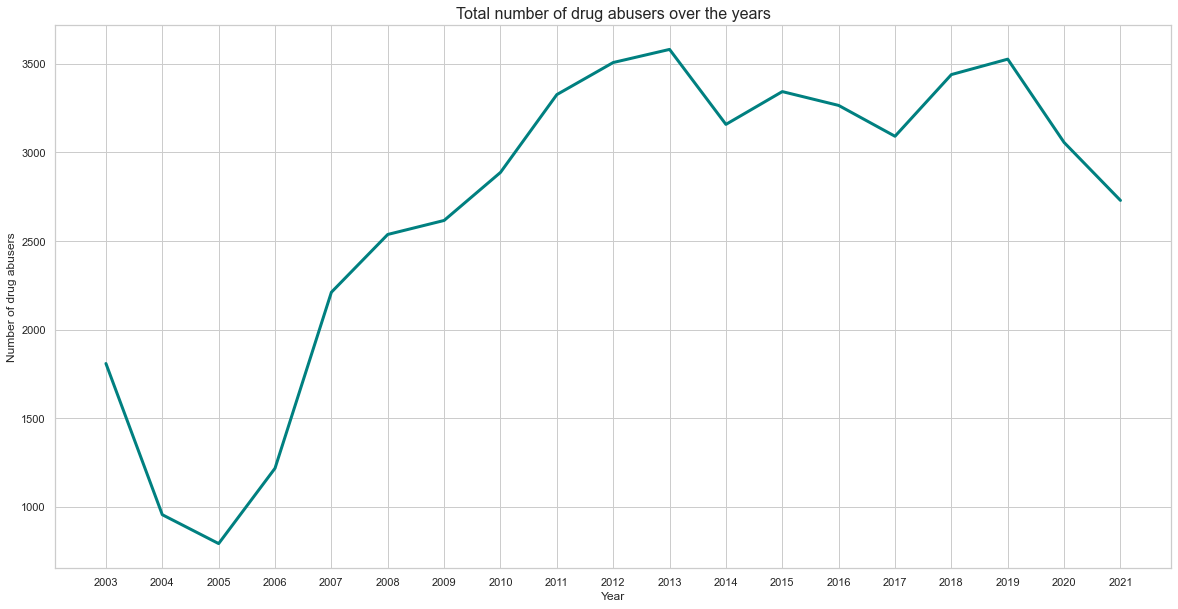

In [6]:
# identify the general trend of drug abusers in Singapore

import matplotlib.pyplot as plt
import seaborn as sns

# set size for plotting
plt.figure(figsize=(20, 10))

#set seaborn plotting aesthetics
sns.set(style='whitegrid')

# get data for the total drug abusers
totalAbusers = data3[data3['status'] == 'Total']
# filter the data to only produce datat that is needed for graph (years and total number of drug abusers)
withoutAge = totalAbusers.filter(['year', 'no_of_drug_abusers'])

# get the years data has been recorded for
years = data3['year'].unique()

# empty list to store the sum of drugAbusers per year
drugAbuserNumber = []
# loop through the years array
for i in years:
    # get the sum of drug abusers for the current year being looped
    totalPerYear = ((withoutAge[withoutAge['year'] == i])['no_of_drug_abusers']).sum()
    # add the sum to drugAbuserNumber list
    drugAbuserNumber.append(totalPerYear)

#create line chart
sns.lineplot(x=years, y=drugAbuserNumber, color = 'teal',linewidth=3)

#add overall title
plt.title('Total number of drug abusers over the years', fontsize=16)

#add axis titles
plt.xlabel('Year')
plt.ylabel('Number of drug abusers')

# define the ticks for x axis
plt.xticks(years)

plt.show()

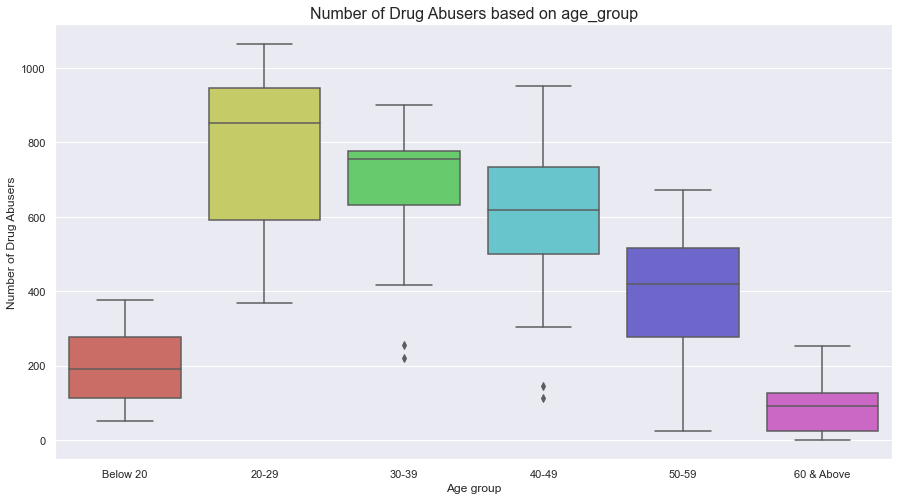

In [7]:
# find the age demographic that is the most affected
import matplotlib.pyplot as plt
import seaborn as sns

# set size for plotting
plt.figure(figsize=(15, 8))

#set seaborn plotting aesthetics
sns.set(style='darkgrid')

# get the data for total drug abusers
totalDrugAbusers = data3[data3['status'] == 'Total']
# filter the data to only get the data needed for plotting(age group and total drug abusers)
withoutYear = totalDrugAbusers.filter(['age_group', 'no_of_drug_abusers'])
#create box chart
sns.boxplot(x="age_group", y="no_of_drug_abusers", data=withoutYear, palette = sns.color_palette("hls", n_colors = len(totalDrugAbusers['age_group'].unique())))

#add overall title
plt.title('Number of Drug Abusers based on age_group', fontsize=16)

#add axis titles
plt.xlabel('Age group')
plt.ylabel('Number of Drug Abusers')

plt.show()

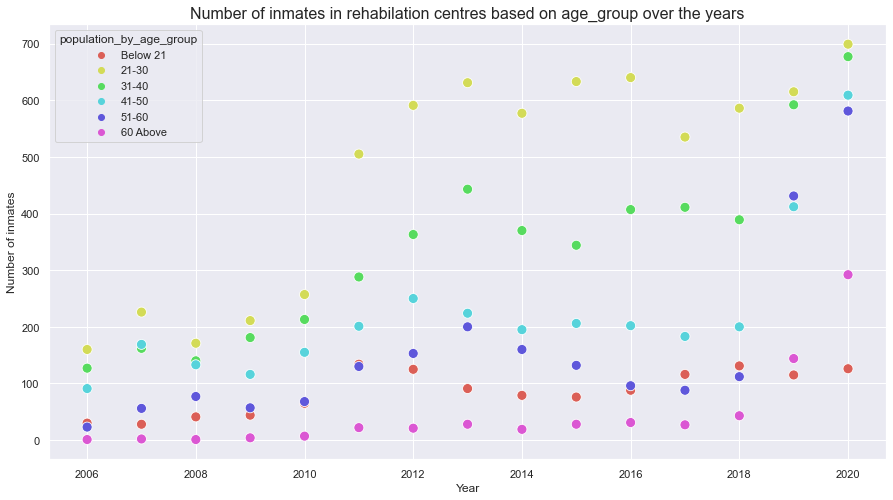

In [8]:
# find how many people are getting help in rehabilation centres based on age demographic 
import matplotlib.pyplot as plt
import seaborn as sns

# set size for plotting
plt.figure(figsize=(15, 8))

#set seaborn plotting aesthetics
sns.set(style='darkgrid')

#create scatter chart
sns.scatterplot(data=data2, x="year", y="number_of_population", hue="population_by_age_group", palette = sns.color_palette("hls"), s=100)

#add overall title
plt.title('Number of inmates in rehabilation centres based on age_group over the years', fontsize=16)

#add axis titles
plt.xlabel('Year')
plt.ylabel('Number of inmates')

plt.show()

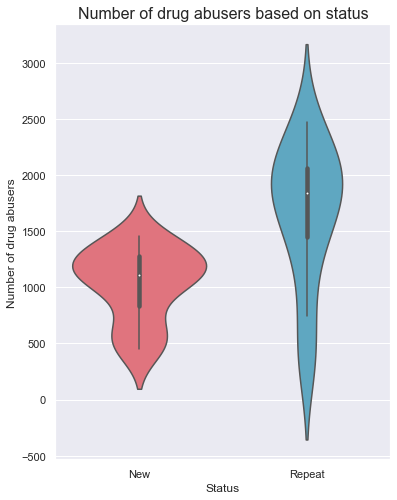

In [9]:
# find how effective the measures taken are
import matplotlib.pyplot as plt
import seaborn as sns

# set size for plotting
plt.figure(figsize=(6, 8))

#set seaborn plotting aesthetics
sns.set(style='darkgrid')

# filter data to only get the data needed for plotting(status and number of drug abusers)
withoutYear = data4.filter(['status', 'no_of_drug_abusers'])
# 
withoutTotal = withoutYear[withoutYear['status'] != 'Total']
#create box chart
sns.violinplot(x="status", y="no_of_drug_abusers", data=withoutTotal,palette = sns.color_palette(["#f26270","#4faed1"]))

#add overall title
plt.title('Number of drug abusers based on status', fontsize=16)

#add axis titles
plt.xlabel('Status')
plt.ylabel('Number of drug abusers')

plt.show()

In [10]:
print("The question I had in mind was which capital offence is the most prevalent in Singapore and if sufficient measures are being taken to prevent them")

print("The dataset I used to find the offence with the highest execution is the Judicial Executions dataset in Data.gov.sg")
print("Based on the pie chart I can tell that with 70% of all executions, the most number of executions is for drug")
print("Based on the bar chart I can tell that throught the years 2007 to 2019, the number of executions for Drug has been the highest with the exception of in 2008\n")

print("To find how Singapore has been faring against other countries in preventing drug abuse, I used the Prevalance of substance use disorders dataset from OurWorldInData")
print("I narrowed down the dataset to get the data for only South East Asian countries")
print("Based on the line chart I can tell that Singapore has been in the 4th ranking throughout the years.")
print("Eventhough the percentage of substance abuse prevalance isn't as high as countries like Thailand, there is still room for improvement especially when comparing with countries like Indonesia whcih has had the lowest prevalence of substance abuse throughout all the years")

print("To find the total number of drug abusers in Singapore I used the Demographic Profile of Drug Abusers dataset from Data.gov.sg")
print("I used a line chart for this dataset to find the trend of drug abusers in Singapore")
print("Based on the line chart I can tell that the number of drug abusers has generally increased over the years")
print("From 2003 to 2005 the number of drug abusers had been decreasing to its lowest of " + str(min(drugAbuserNumber)))
print("However, from 2005 to 2013, the number of drug abusers had increased significantly to its peak of "+ str(max(drugAbuserNumber)))
print("Throughout the years 2013 to 2019, the number of drug abusers has been continuously decreasing and increasing from 2019 onwards the number of drug abusers has been decreasing\n")

print("Using the same dataset I decided to find out the age-group most affected by drugs")
print("By plotting a box chart i was able to easily identify that the age group that is affected the most by drugs is 20-29.")
print("The order from the most affected to least affected age group: ")
print("20-29, 30-39, 40-49, 50 -59, Below 20, 60 & Above\n")

print("To check if the people affected by drugs are getting the help they need I used the population of inmates in drug rehabilation centre dataset from Data.gov.sg")
print("Using a scatterplot i can tell that the number of people going through rehab has increased over the years. ")
print("I can also tell that the age group that goes to rehab the most is 21-30")
print("The amount of people going to rehab per age age group is quite proportionate to the number of total drug abusers per age group")
print("This shows that most drug abusers do get the help that they require in Singapore.\n")

print("But is the help they get truly effective?")
print("Using the drug Abusers by status dataset I plotted a violin plot to see the number of new and repeated drug abusers over the years")
print("With this violin plot I can tell that the number of repeated drug abusers is significantly higher than that of the new drug abusers")
print("The median of the repeated offenders are around 1700 while the median of the new offenders are around 1100")
print("The thickness of the graph at the different sections shows the frequency of the number of drug abusers over the years")
print("This shows that for most of the years the number of new offenders has been around 1200")
print("Even though the biggest thickness of the new offenders is larger than that of the repeated offenders, the biggest thickness of the repeted offenderd is at a higher value of 1600")
print("Which shows that the measures Singapore taken to tackle drug abuse is insufficient and ineffective.\n")

print("In conclusion, drug abuse is a prevalant problem, that has especially affected the youths in Singapore")
print("All though many drug abusers do get help in rehabilation centres, not all of them get the help they need")
print("The measures taken are also ineffective as shown by the number of repeated offenders still being high")
print("The number of drug abusers has gone down in the past few years however it is no where near the best that we could do")
print("We can see that there are several countries who has lesser prevalance of substance abuse, which means that it is possible for Singapore to have lesser drug abusers")

The question I had in mind was which capital offence is the most prevalent in Singapore and if sufficient measures are being taken to prevent them
The dataset I used to find the offence with the highest execution is the Judicial Executions dataset in Data.gov.sg
Based on the pie chart I can tell that with 70% of all executions, the most number of executions is for drug
Based on the bar chart I can tell that throught the years 2007 to 2019, the number of executions for Drug has been the highest with the exception of in 2008

To find how Singapore has been faring against other countries in preventing drug abuse, I used the Prevalance of substance use disorders dataset from OurWorldInData
I narrowed down the dataset to get the data for only South East Asian countries
Based on the line chart I can tell that Singapore has been in the 4th ranking throughout the years.
Eventhough the percentage of substance abuse prevalance isn't as high as countries like Thailand, there is still room for imp